In [46]:
import pandas as pd
import matplotlib.pyplot as plt

Aim of the project:
   1. which elements of a user's profile contribute to their popularity.
Things to consider:
   2. Are there any differences in the way males and females vote?
   3. Are there factors which lead to an increased level of popularity of the user being voted on?
   4. How about attributes that are shared between the active and passive user?
   5. Can you suggest any way that the results of your analysis can be implemented? This could be the introduction of a new feature in the app, a change to an existing feature, or anything else you can think of...

NB - "Popularity" can be thought of as "what % of positive responses" a user receives ie. yes vote ratio. This is calcluated as yes votes divided by total votes

In [47]:
#Read events CSV into a DataFrame
#Each row represents a single swipe. A "left swipe" is a no and a "right swipe" is a yes
pd.set_option('display.max_columns', None)
events = pd.read_csv('../Data/events.csv')
events.head()

,Active User,Passive User,yes_vote
0,38411,54288,0
1,50211,34398,0
2,45114,43284,1
3,14307,25947,1
4,25595,26064,0


In [48]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290610 entries, 0 to 290609
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Active User   290610 non-null  int64
 1   Passive User  290610 non-null  int64
 2   yes_vote      290610 non-null  int64
dtypes: int64(3)
memory usage: 6.7 MB


In [49]:
#Read user_profiles CSV into a DataFrame
'''
essay0- My self summary
essay1- What I’m doing with my life
essay2- I’m really good at
essay3- The first thing people usually notice about me
essay4- Favorite books, movies, show, music, and food
essay5- The six things I could never do without
essay6- I spend a lot of time thinking about
essay7- On a typical Friday night I am
essay8- The most private thing I am willing to admit
essay9- You should message me if...
'''
original_profiles = pd.read_csv('../Data/user_profiles.csv')
profiles = original_profiles.copy()
profiles.head(2)

,age,body_type,drinks,drugs,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,UID
0,22,a little extra,socially,never,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,0
1,35,average,often,sometimes,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,1


In [50]:
#Remove non-straight orientation profiles for now
profiles = profiles[profiles['orientation'] == 'straight']

In [51]:
events.head(2)

,Active User,Passive User,yes_vote
0,38411,54288,0
1,50211,34398,0


In [52]:
#Calculating Yes_Vote_Ratio
aggregated_events = events.copy()
aggregated_events['yes_vote_ratio'] = aggregated_events['yes_vote']
aggregated_events = aggregated_events.groupby('Passive User')
yes_vote_ratio = aggregated_events['yes_vote_ratio'].mean()

In [53]:
drop_list = []
for x in list(range(10)):
    drop_list.append('essay'+str(x))

In [54]:
#Adding Yes_Vote_Ratio column to the Profiles df
profiles['Passive User'] = profiles['UID']
profiles = profiles.merge(yes_vote_ratio, how='inner', on='Passive User').drop(columns='Passive User')

#Data cleaning
profiles = profiles[(profiles['age']>12)&(profiles['age']<95)]
profiles['UID'] = profiles['UID'].astype(str)
profiles.drop(columns=drop_list, inplace=True)
profiles.head(2)

,age,body_type,drinks,drugs,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,UID,yes_vote_ratio
0,22,a little extra,socially,never,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,0,0.000000
1,35,average,often,sometimes,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,1,0.166667


In [55]:
#Dividing the Profiles df into Male and Female
male_profiles = profiles[profiles['sex']=='m']
female_profiles = profiles[profiles['sex']=='f']

1. The **test statistic** is the difference in the yes_vote_ratio among the Bumble Users.

2. The **null hypothesis** is that all the elements in a user's profile contribute in the same way towards their popularity (yes_vote_ratio).

3. The third step is to compute a **p-value**, which is the probability of seeing the apparent effect if the null hypothesis is true. In the NSFG example, we would compute the actual difference in means, then compute the probability of seeing a difference as big, or bigger, under the null hypothesis.

4. The last step is to interpret the result. If the p-value is low, the effect is said to be **statistically significant**, which means that it is unlikely to have occurred by chance. In that case we infer that the effect is more likely to appear in the larger population.

Numeric columns Scatter plot

por un lado hombres y otro mujeres

hor yes_vote_ratio

ver age

Non-numeric columns Buckets

In [56]:
#Data Aggregation
aggregated_profiles = profiles.groupby('age')['yes_vote_ratio'].mean()

In [57]:
male_profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30258 entries, 0 to 50788
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30258 non-null  int64  
 1   body_type       28097 non-null  object 
 2   drinks          28644 non-null  object 
 3   drugs           22868 non-null  object 
 4   ethnicity       27451 non-null  object 
 5   height          30256 non-null  float64
 6   income          30258 non-null  int64  
 7   job             26461 non-null  object 
 8   offspring       11841 non-null  object 
 9   orientation     30258 non-null  object 
 10  pets            19096 non-null  object 
 11  religion        20069 non-null  object 
 12  sex             30258 non-null  object 
 13  sign            23703 non-null  object 
 14  smokes          27264 non-null  object 
 15  UID             30258 non-null  object 
 16  yes_vote_ratio  30258 non-null  float64
dtypes: float64(2), int64(2), object

In [58]:
def grid_rows(cols):
    #calculate the necessary number of rows in the grid chart
    if len(cols)%3==0:
        return int(len(cols)/3)
    else:
        return int((len(cols)/3)+1)

In [59]:
def scatter_plot(dataframe):
    #get numeric columns
    numeric_columns = dataframe.select_dtypes(include=['int64','float64']).columns
    
    #print correlations between the different columns and the yes_vote_ratio
    print('yes_vote_ratio_correlation')
    print(dataframe.corr()['yes_vote_ratio'].round(4))
    
    #create grid chart
    plt.figure(figsize=(20,10))
    
    #calculate the necessary number of rows in the grid chart by calling 'grid_rows' function and save it to a variable
    grid_row = int(grid_rows(numeric_columns))
    
    #iterate over and scatter plot numeric columns
    for i, column in zip(range(1,len(numeric_columns)), numeric_columns):
        plt.subplot(grid_row, 3, i)
        plt.scatter(x=dataframe[column], y=dataframe['yes_vote_ratio'], alpha=0.2)
        plt.title(column + ' (Corr: '+ str(dataframe.corr()['yes_vote_ratio'][column].round(4)) + ')')
        
        #add labels
        plt.ylabel('yes_vote_ratio')
        plt.xlabel(column)
        
    plt.legend()
    plt.show()

yes_vote_ratio_correlation
age              -0.0698
height            0.0076
income            0.0167
yes_vote_ratio    1.0000
Name: yes_vote_ratio, dtype: float64


No handles with labels found to put in legend.


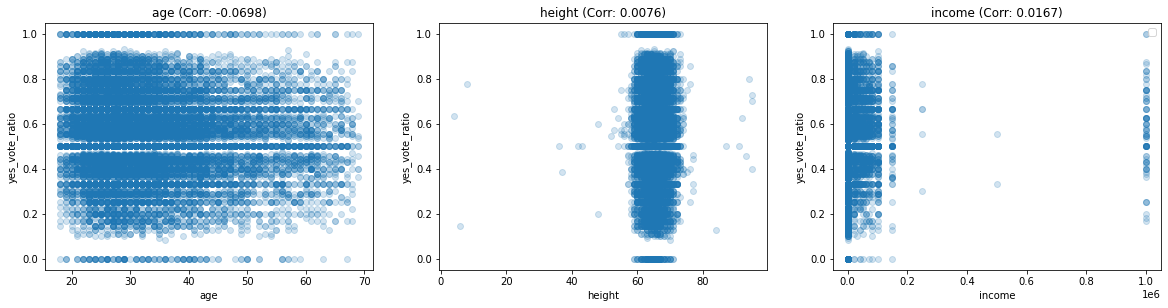

In [60]:
scatter_plot(female_profiles)

No handles with labels found to put in legend.


yes_vote_ratio_correlation
age               0.0282
height           -0.0013
income            0.0110
yes_vote_ratio    1.0000
Name: yes_vote_ratio, dtype: float64


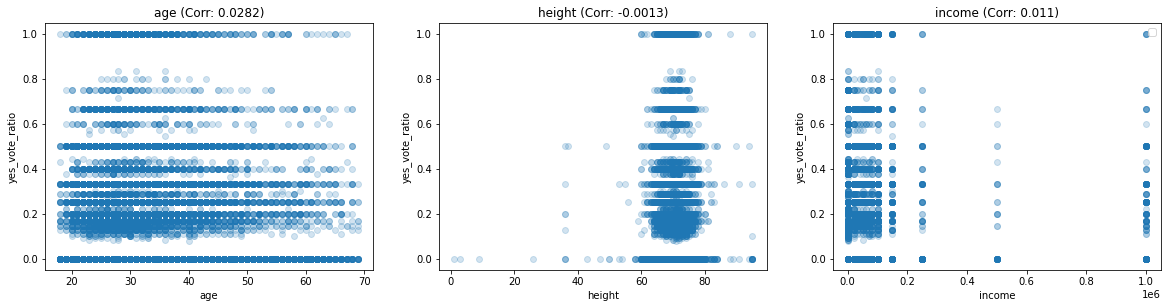

In [61]:
scatter_plot(male_profiles)

In [62]:
non_numeric_columns = male_profiles.select_dtypes(include=['object']).columns
non_numeric_columns

Index(['body_type', 'drinks', 'drugs', 'ethnicity', 'job', 'offspring',
       'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'UID'],
      dtype='object')

In [68]:
male_profiles['ethnicity'].value_counts()

white                                                                                              16495
asian                                                                                               3051
hispanic / latin                                                                                    1418
black                                                                                                964
other                                                                                                866
                                                                                                   ...  
asian, middle eastern, indian, hispanic / latin, white, other                                          1
asian, middle eastern, black, native american, pacific islander, hispanic / latin, white, other        1
middle eastern, native american, hispanic / latin                                                      1
middle eastern, black, native american, indian, white, 

In [64]:
grid_row = int(grid_rows(non_numeric_columns))
grid_row

5

Index(['body_type', 'drinks', 'drugs', 'ethnicity', 'job', 'offspring',
       'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'UID'],
      dtype='object')
5
['athletic', 'average', 'fit', 'thin', 'a little extra', 'skinny', 'jacked', 'overweight', 'used up', 'full figured', 'rather not say', 'curvy']
[8431, 7527, 7057, 1734, 1476, 901, 262, 238, 223, 95, 80, 73]
['socially', 'rarely', 'often', 'not at all', 'very often', 'desperately']
[20813, 2961, 2787, 1661, 246, 176]
['never', 'sometimes', 'often']
[18381, 4244, 243]
['white', 'asian', 'hispanic / latin', 'black', 'other', 'indian', 'hispanic / latin, white', 'asian, white', 'white, other', 'asian, pacific islander', 'pacific islander', 'middle eastern', 'middle eastern, white', 'native american, white', 'black, white', 'pacific islander, white', 'hispanic / latin, other', 'black, other', 'hispanic / latin, white, other', 'black, hispanic / latin', 'black, native american', 'asian, other', 'black, native american, whi

[16495, 3051, 1418, 964, 866, 725, 630, 415, 368, 219, 213, 177, 158, 146, 121, 87, 73, 69, 67, 56, 55, 52, 48, 46, 42, 41, 41, 40, 39, 33, 30, 30, 26, 26, 25, 24, 20, 20, 20, 18, 18, 15, 14, 14, 13, 12, 12, 11, 10, 10, 9, 9, 9, 9, 8, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['computer / hardware / software', 'science / tech / engineering', 'other', 'sales / marketing / biz dev', 'student', 'artistic / musical / writer', 'executive / management', 'entertainment / media', 'banking / financial / real estate', 'medicine / health', 'education / academia', 'construction / craftsmanship', 'hospitality / travel', 'law / legal services', 'political / governmen

<function matplotlib.pyplot.show(close=None, block=None)>

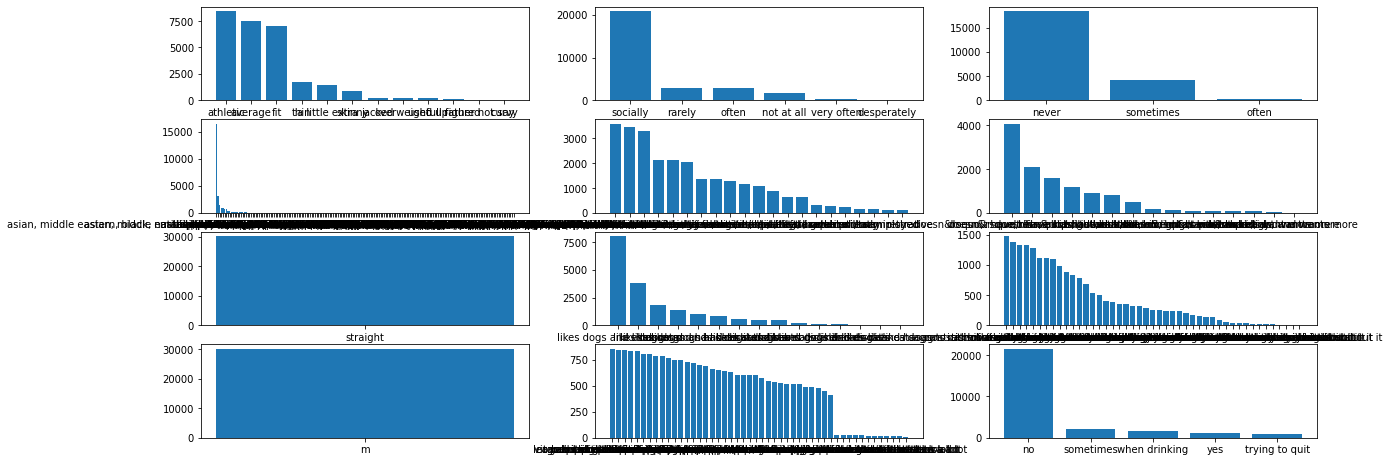

In [65]:
#get non-numeric columns
non_numeric_columns = male_profiles.select_dtypes(include=['object']).columns
print(non_numeric_columns)
#create grid chart
plt.figure(figsize=(20,10))

#calculate the necessary number of rows in the grid chart by calling 'grid_rows' function and save it to a variable
grid_row = int(grid_rows(non_numeric_columns))
print(grid_row)
for i, column in zip(range(1,len(non_numeric_columns)), non_numeric_columns):
    plt.subplot(grid_row, 3, i)
    x_values = male_profiles[column].value_counts().index.tolist()
    print(x_values)
    y_values = []
    for x in x_values:
        y_values.append(male_profiles[column].value_counts()[x])
    print(y_values)
    plt.bar(x_values, y_values)
plt.show

In [66]:
bar(male_profiles)

NameError: name 'bar' is not defined

In [ ]:
x_values = male_profiles['body_type'].value_counts().index.tolist()
y_values = []
for x in x_values:
    y_values.append(male_profiles['body_type'].value_counts()[x])
plt.barh(x_values, y_values)
plt.show()

In [ ]:
def bar_plot(dataframe):
    #get numeric columns
    non_numeric_columns = dataframe.select_dtypes(include=['object']).columns
    
    #create grid chart
    plt.figure(figsize=(20,10))
    
    #calculate the necessary number of rows in the grid chart by calling 'grid_rows' function and save it to a variable
    grid_row = int(grid_rows())
    
    #iterate over and bar plot numeric columns
    for column in non_numeric_columns:  
        x_values = dataframe['body_type'].value_counts().index.tolist()
        print(x_values)
        y_values = []
        for x in x_values:
            y_values.append(dataframe['body_type'].value_counts()[x])
            plt.bar(x_values, y_values)                
    plt.legend()
    plt.show()

In [ ]:
bar_plot(male_profiles)